In [4]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:/Users/HP/DATA FOR DATA SCIENCE/mexico-real-estate-clean2.csv")

#Which state has the most expensive real estate market?
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_price_by_state

state
Querétaro                          133955.913281
Guanajuato                         133277.965833
Nuevo León                         129221.985663
Distrito Federal                   128347.267426
Quintana Roo                       128065.416053
Chihuahua                          127073.852000
Jalisco                            123386.472167
Estado de México                   122723.490503
Campeche                           121734.633333
Puebla                             121732.974000
Guerrero                           119854.276122
Sonora                             114547.883333
Morelos                            112697.295625
Aguascalientes                     110543.888000
Baja California Sur                109069.339333
Yucatán                            108580.388596
Chiapas                            104342.313273
Veracruz de Ignacio de la Llave     96928.125128
Hidalgo                             94012.326471
Sinaloa                             93922.152308
Tamaulipas    

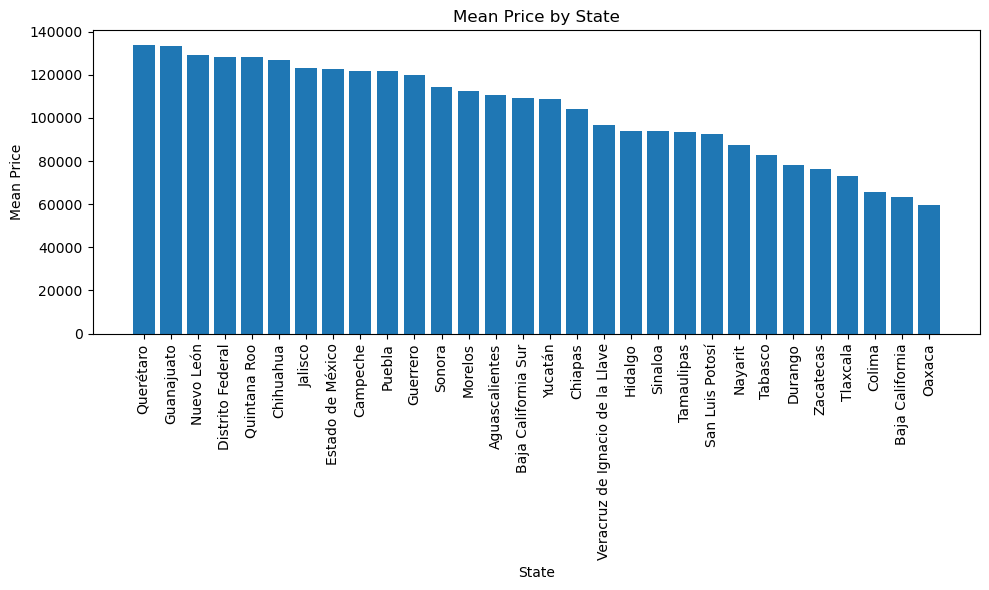

In [5]:
#bar chart for `mean_price_by_state`
states = mean_price_by_state.index
mean_prices = mean_price_by_state.values

plt.figure(figsize=(10,6))
plt.bar(states,mean_prices)
plt.xlabel('State')
plt.ylabel('Mean Price')
plt.title('Mean Price by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
# Create "price_per_m2" column
df["price_per_m2"] = df["price_usd"] / df["area_m2"]
df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


<Figure size 1500x600 with 0 Axes>

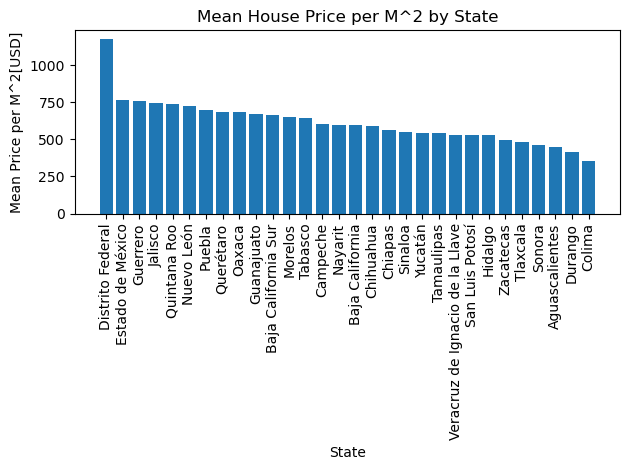

<Figure size 1500x600 with 0 Axes>

In [8]:
mean_price_per_m2 = df.groupby("state")["price_per_m2"].mean().sort_values(ascending=False)
plt.bar(mean_price_per_m2.index, mean_price_per_m2.values)
plt.xlabel("State")
plt.ylabel("Mean Price per M^2[USD]")
plt.title("Mean House Price per M^2 by State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.figure(figsize=(15,6))

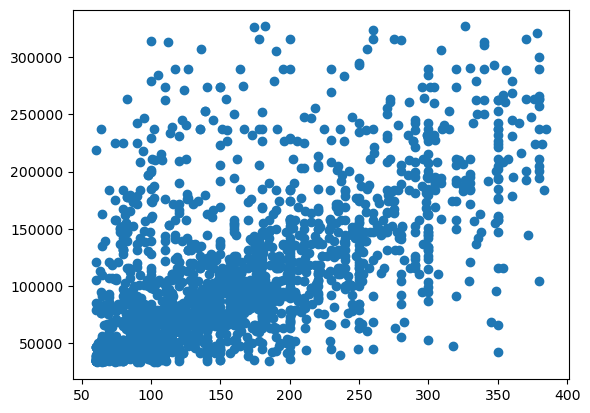

In [10]:
#Is there a relationship between home size and price?
# Create scatter plot of "price_usd" vs "area_m2"
plt.scatter(df["area_m2"], df["price_usd"])
plt.xlabel = "price_usd"
plt.ylabel = "Area [sq meters]"
plt.title = "Price [USD]";

In [12]:
# Calculate correlation of "price_usd" and "area_m2"
p_correlation = df["price_usd"].corr(df["area_m2"])
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Mexico): 0.5855182453232061


In [16]:
#The correlation coefficient is over 0.5, so there's a moderate relationship house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states, starting with Morelos.
df_morelos = df[df["state"] == "Morelos"]
df_morelos.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305,227351.46,745.414623


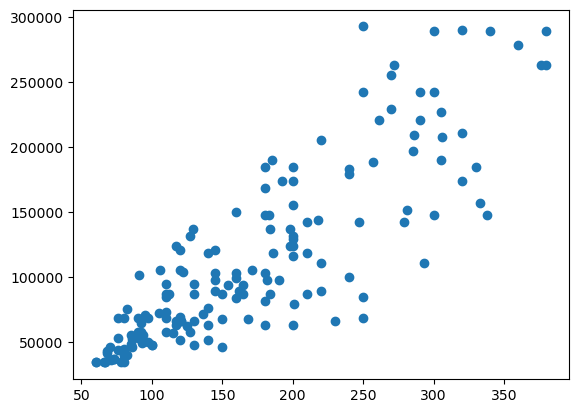

In [18]:
plt.scatter(df_morelos["area_m2"], df_morelos["price_usd"])
plt.xlabel = "price_usd"
plt.ylabel = "Area [sq meters]"
plt.title = "Morelos: Price vs. Area";

In [21]:
# Calculate correlation of "price_usd" and "area_m2" in `df_morelos`
p_correlation_morelos = df_morelos["area_m2"].corr(df_morelos["price_usd"])
print("Correlation of 'area_m2' and 'price_usd' (Morelos):", p_correlation_morelos)

Correlation of 'area_m2' and 'price_usd' (Morelos): 0.8498077608713708


TypeError: 'str' object is not callable

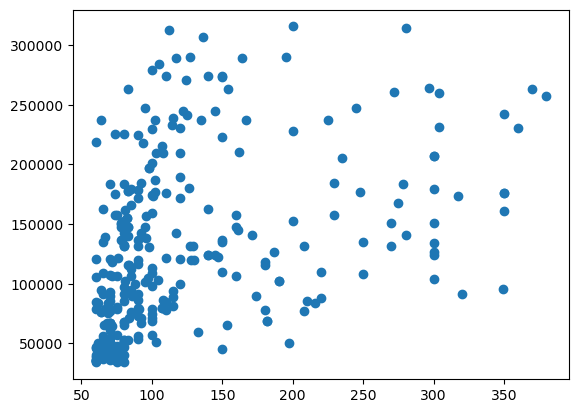

In [23]:
# Declare variable `df_mexico_city` by subsetting `df`
df_mexico_city = df[df["state"] == "Distrito Federal"]


# Create a scatter plot "price_usd" vs "area_m2" in Distrito Federal
plt.scatter(df_mexico_city["area_m2"], df_mexico_city["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Mexico City: Price vs. Area")

In [24]:
p_correlation_mexico_city = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])
print("Correlation of 'area_m2' and 'price_usd' (Mexico City):", p_correlation_mexico_city)

Correlation of 'area_m2' and 'price_usd' (Mexico City): 0.41070392130717887
